In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display first 5 rows of train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Insights on Age Distribution
The Age distribution is right-skewed with more passengers being younger adults. There are some children and older adults present.

### Relationship between Gender and Survival
Females had a significantly higher survival rate compared to males, indicating gender was an important factor.

In [2]:
# Overview of train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Summary statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Value counts for 'Sex'
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

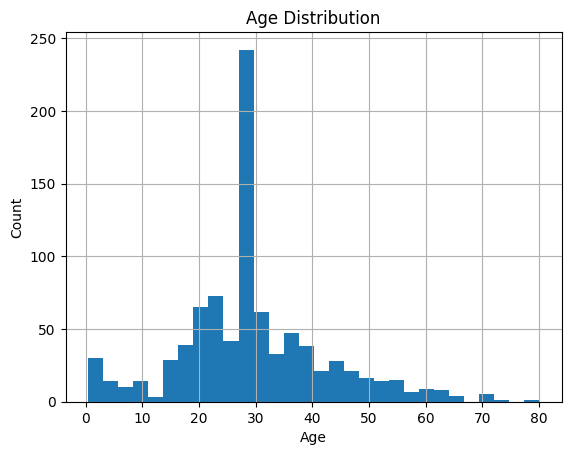

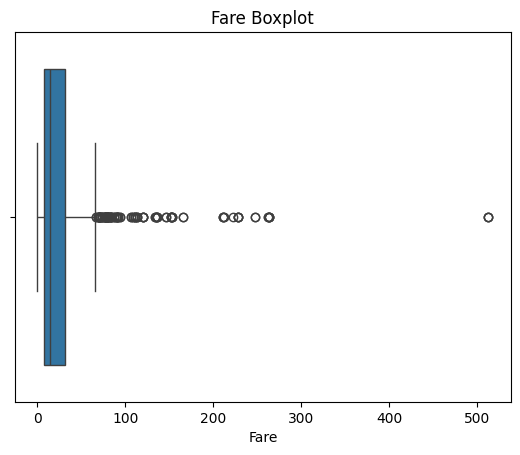

In [8]:
# Histogram of Age
train['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Boxplot of Fare
sns.boxplot(x='Fare', data=train)
plt.title('Fare Boxplot')
plt.show()

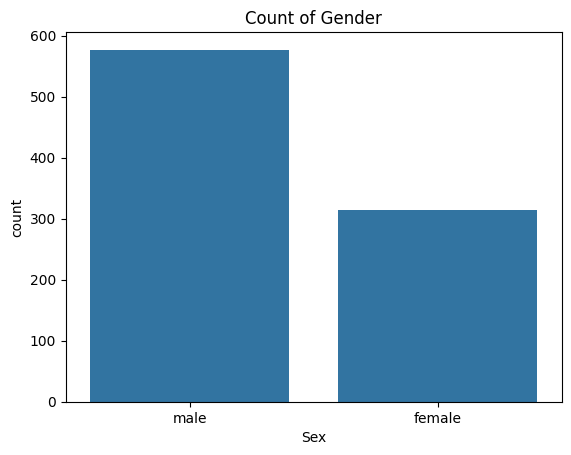

In [9]:
sns.countplot(x='Sex', data=train)
plt.title('Count of Gender')
plt.show()

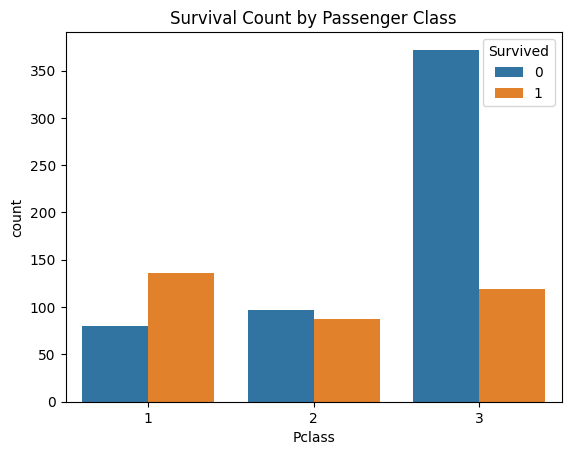

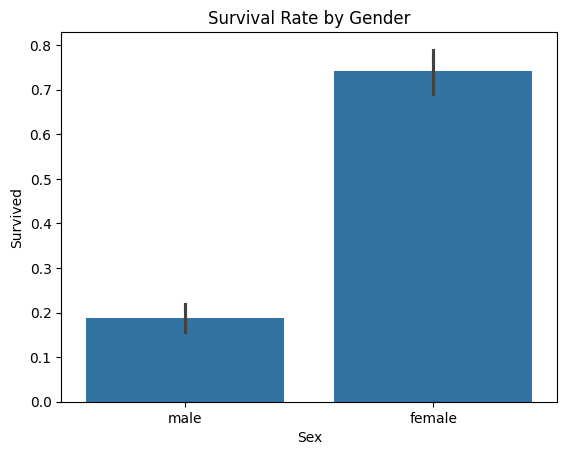

In [10]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Count by Passenger Class')
plt.show()

sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.show()

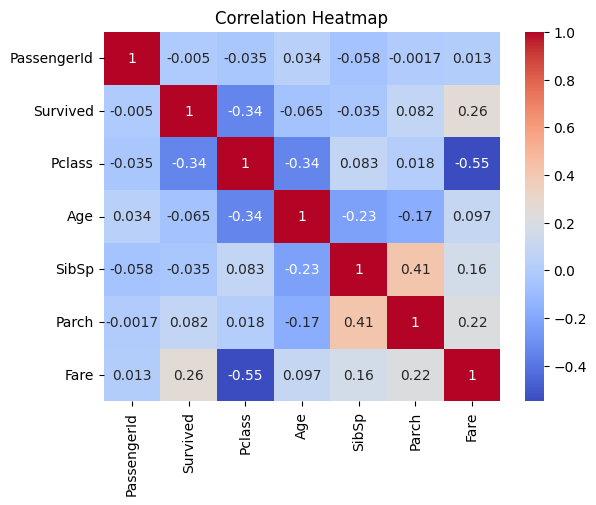

In [12]:
corr = train.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

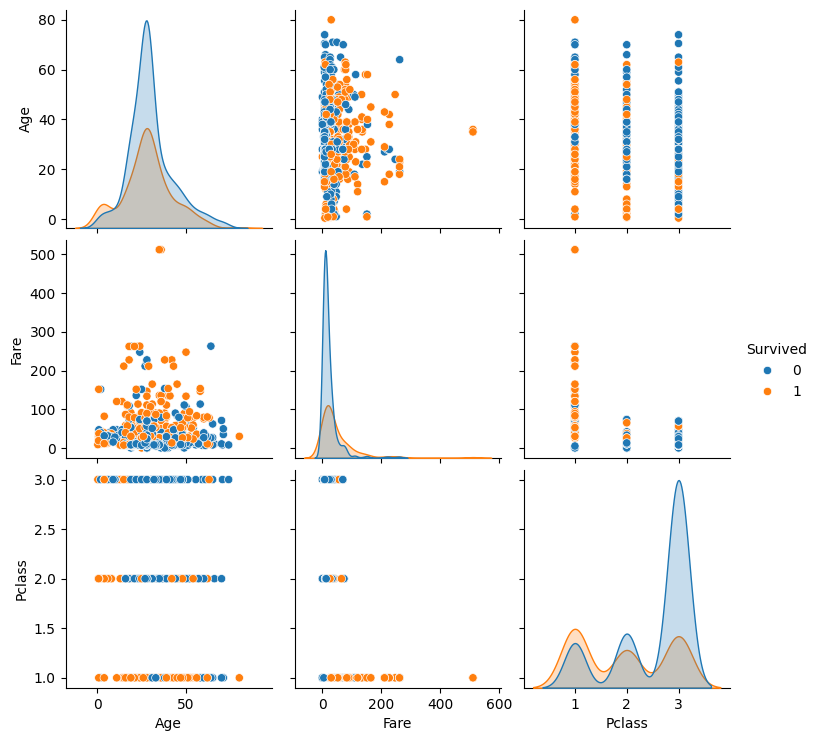

In [15]:
sns.pairplot(train[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()

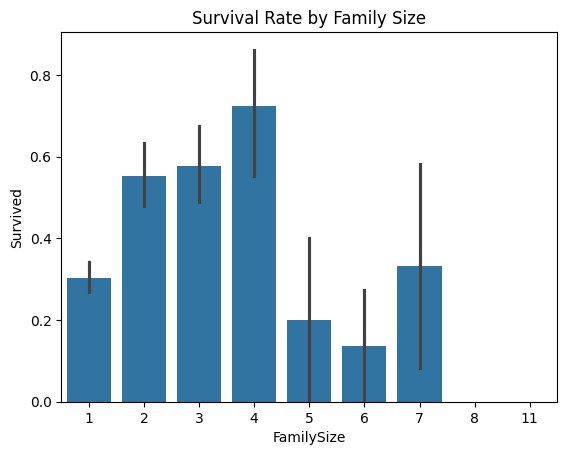

In [16]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=train)
plt.title('Survival Rate by Family Size')
plt.show()

## Summary of Findings
- Females had a higher survival rate than males.
- Passengers in higher classes (1st and 2nd) had better survival chances.
- Younger passengers had a slightly higher chance of surviving.
- Family size influenced survival, with medium-sized families having better rates.
